In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import palette, models_order, assignments_order

In [29]:
dataset = "restaurants"

In [30]:
df = pd.read_csv(f'../results/{dataset}_x_results_auc.csv', index_col=0)
df.head()

,auc,prauc,model,assignment,k,iteration
0,0.831121,0.029494,BiAA,soft,2,0
1,0.826429,0.024187,SBM,soft,2,0
2,0.835271,0.038601,DBiAA,soft,2,0
3,0.789075,0.038600,DSBM,soft,2,0
4,0.790760,0.014522,BiAA,hard,2,0


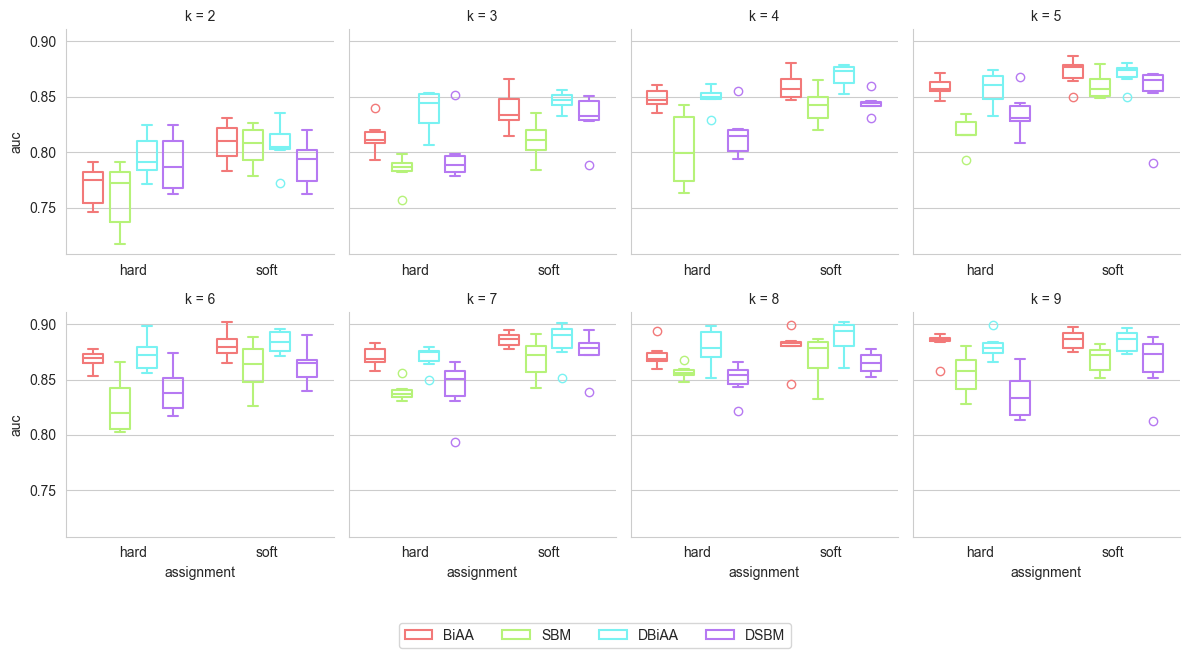

In [31]:
g = sns.FacetGrid(df, col="k", col_wrap=4, palette=palette, sharex=False)
g.map_dataframe(
    sns.boxplot,
    x='assignment',
    order=assignments_order,
    y='auc',
    hue='model',
    hue_order=models_order,
    palette=palette,
    dodge=True,
    fill=False,
    gap=.25
)

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, -.1))

# save figure
# plt.savefig(f'figures/{dataset}_boxplot.pdf', dpi=300)

plt.show()

In [32]:
df = pd.read_csv(f'../results/{dataset}_x_results_loss.csv')
df = df.groupby(['k', 'model', 'assignment', 'step']).mean().reset_index()
df.head()

,k,model,assignment,step,Unnamed: 0,loss,iteration
0,2,BiAA,hard,0,32800.0,3258.984172,2.5
1,2,BiAA,hard,20,32801.0,3008.983602,2.5
2,2,BiAA,hard,40,32802.0,2865.230387,2.5
3,2,BiAA,hard,60,32803.0,2812.709188,2.5
4,2,BiAA,hard,80,32804.0,2780.653158,2.5


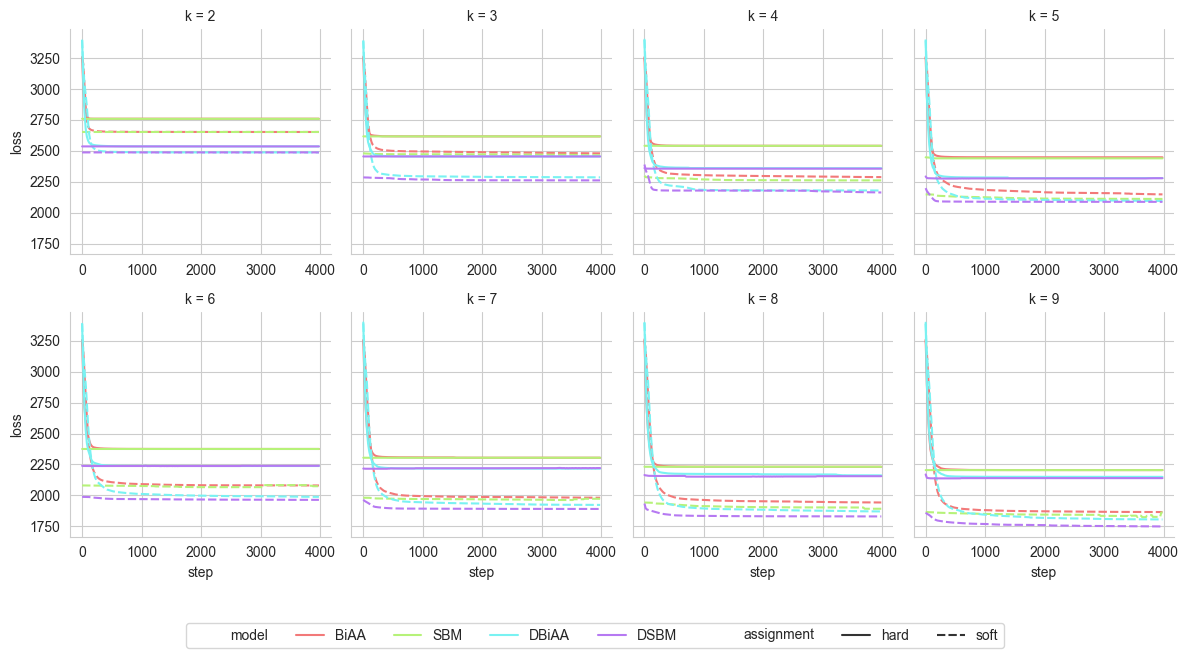

In [33]:
g = sns.FacetGrid(df, col="k", col_wrap=4, palette=palette, sharex=False)
g.map_dataframe(
        sns.lineplot,
            x='step',
            y='loss',
            hue='model',
            hue_order=models_order,
            style='assignment',
            palette=palette,
        )

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, -.1))

# save figure fig
# fig.savefig(f'figures/{dataset}_loss.pdf', dpi=300)

plt.show()